# Homework - Data Visualizaiton

## Nevena Pavlovska and Martin Penev

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import altair as alt
import seaborn as sns
from collections import Counter
from vega_datasets import data
import matplotlib.cm as cm

import warnings

warnings.filterwarnings('ignore')
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

## Loading the data

In [2]:
df = pd.read_csv(r".\database.csv")
df

departure               return departure_id  \
0         2020-03-23 06:09:44  2020-03-23 06:16:26           86   
1         2020-03-23 06:11:58  2020-03-23 06:26:31           26   
2         2020-03-23 06:16:29  2020-03-23 06:24:23          268   
3         2020-03-23 06:33:53  2020-03-23 07:14:03          751   
4         2020-03-23 06:36:09  2020-03-23 07:04:10           62   
...                       ...                  ...          ...   
12157453  2017-10-30 23:43:00  2017-10-30 23:55:00         64.0   
12157454  2017-10-30 23:49:00  2017-10-31 04:49:00        117.0   
12157455  2017-10-30 23:52:00  2017-10-31 00:02:00        142.0   
12157456  2017-10-30 23:57:00  2017-10-31 00:00:00         28.0   
12157457  2017-10-30 23:59:00  2017-10-31 00:12:00         20.0   

             departure_name return_id       return_name  distance (m)  \
0                  Kuusitie     111.0     Esterinportti        1747.0   
1                Kamppi (M)      10.0       Kasarmitori        1447.0   
2          Porolahden koulu     254.0       Agnetankuja        1772.0   
3                Vallipolku     106.0   Korppaanmäentie        7456.0   
4          Länsisatamankatu     121.0  Vilhonvuorenkatu        7120.0   
...                     ...       ...               ...           ...   
12157453    Tyynenmerenkatu      64.0   Tyynenmerenkatu         918.0   
12157454   Brahen puistikko      44.0     Sörnäinen (M)         822.0   
12157455        Koskelantie     141.0        Intiankatu        1817.0   
12157456        Lastenlehto      26.0        Kamppi (M)         416.0   
12157457  Kaisaniemenpuisto     114.0      Ratapihantie        2856.0   

          duration (sec.)  avg_speed (km/h)  departure_latitude  \
0                   401.0          0.261397           60.195245   
1                   869.0          0.099908           60.168610   
2                   469.0          0.226695           60.195540   
3                  2406.0          0.185935           60.227827   
4                  1679.0          0.254437           60.158928   
...                   ...               ...                 ...   
12157453            714.0          0.077143           60.156838   
12157454            252.0          0.195714           60.189671   
12157455            594.0          0.183535           60.208749   
12157456            152.0          0.164211           60.165812   
12157457            771.0          0.222257           60.173199   

          departure_longitude  return_latitude  return_longitude  \
0                   24.901900        60.197572         24.926781   
1                   24.930537        60.165017         24.949473   
2                   25.053581        60.187234         25.036412   
3                   24.819614        60.203474         24.898930   
4                   24.909692        60.186463         24.967872   
...                       ...              ...               ...   
12157453            24.920661        60.156838         24.920661   
12157454            24.948102        60.187736         24.960980   
12157455            24.946514        60.207858         24.967638   
12157456            24.927021        60.168610         24.930537   
12157457            24.943301        60.196431         24.936256   

          Air temperature (degC)  
0                            0.9  
1                            0.9  
2                            0.9  
3                            0.9  
4                            0.9  
...                          ...  
12157453                     0.4  
12157454                     0.4  
12157455                     0.4  
12157456                     0.4  
12157457                     0.4  

[12157458 rows x 14 columns]

In [3]:
df.describe()

distance (m)  duration (sec.)  avg_speed (km/h)  departure_latitude  \
count  1.215746e+07     1.215746e+07      1.215391e+07        1.215746e+07   
mean   2.295275e+03     9.597751e+02      3.355556e-01        6.017981e+01   
std    2.452067e+04     7.346528e+03      3.428006e+01        1.733003e-02   
min   -4.292467e+06     0.000000e+00     -4.689001e+02        6.014792e+01   
25%    1.000000e+03     3.440000e+02      1.467403e-01        6.016723e+01   
50%    1.739000e+03     5.860000e+02      1.863679e-01        6.017608e+01   
75%    2.869000e+03     9.710000e+02      2.204348e-01        6.018964e+01   
max    3.681399e+06     5.401659e+06      1.699104e+04        6.023911e+01   

       departure_longitude  return_latitude  return_longitude  \
count         1.215746e+07     1.215746e+07      1.215746e+07   
mean          2.492023e+01     6.017971e+01      2.492023e+01   
std           5.764062e-02     1.738792e-02      5.783290e-02   
min           2.472137e+01     6.014792e+01      2.472137e+01   
25%           2.490969e+01     6.016689e+01      2.490969e+01   
50%           2.493407e+01     6.017559e+01      2.493407e+01   
75%           2.495029e+01     6.018964e+01      2.495029e+01   
max           2.510620e+01     6.023911e+01      2.510620e+01   

       Air temperature (degC)  
count            1.214156e+07  
mean             1.565044e+01  
std              5.497952e+00  
min             -5.200000e+00  
25%              1.230000e+01  
50%              1.640000e+01  
75%              1.930000e+01  
max              3.290000e+01

### Task 1. Univariate: Compare the distribution of 1 quantitative attribute between categories using 2 approaches for univariate data (e.g., strip, jitter, histogram, violin, boxplot)

In [4]:
numOfOccurrencesInClass = df['departure_name'].value_counts().sort_index()
numOfOccurrencesInClass.sort_values(ascending=False)

Itämerentori              330397
Töölönlahdenkatu          242555
Kamppi (M)                201560
Rautatientori / länsi     175358
Ympyrätalo                172776
                           ...  
Elfvik                      2449
Hagalundinpuisto            2365
Itäkeskus Metrovarikko      1233
Outotec                     1150
Derby Business Park          351
Name: departure_name, Length: 347, dtype: int64

We choose 3 classes with low number of data points for faster computation: `Hagalundinpuisto`, `Itäkeskus Metrovarikko` and `Outotec`. We will use those categories for the next plots.

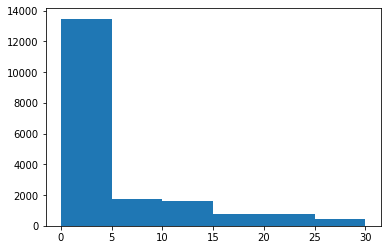

In [5]:
bins = np.linspace(0, 30, 7)
plt.hist(df[df['departure_name'] == 'Itämerentori']['distance (m)'], bins, label='Itämerentori')
plt.show()

In [6]:
limited_df = df[df["departure_name"].isin(["Hagalundinpuisto", "Itäkeskus Metrovarikko", "Outotec"])]
limited_df.head()

departure               return departure_id    departure_name  \
1405  2020-03-23 16:45:47  2020-03-23 16:50:18          901           Outotec   
5424  2020-03-24 19:54:45  2020-03-24 20:02:09          901           Outotec   
5546  2020-03-24 20:50:17  2020-03-24 21:25:44          901           Outotec   
7559  2020-03-25 16:13:34  2020-03-25 16:26:10          538  Hagalundinpuisto   
7827  2020-03-25 16:48:40  2020-03-25 17:14:07          538  Hagalundinpuisto   

     return_id   return_name  distance (m)  duration (sec.)  avg_speed (km/h)  \
1405     641.0  Komeetankatu         805.0            268.0          0.180224   
5424     635.0      Kuunkatu        1647.0            440.0          0.224591   
5546     901.0       Outotec        1681.0           2126.0          0.047441   
7559     523.0  Ahertajantie        1279.0            721.0          0.106436   
7827     595.0  Westendintie        3895.0           1528.0          0.152945   

      departure_latitude  departure_longitude  return_latitude  \
1405           60.163412            24.742219        60.167216   
5424           60.163412            24.742219        60.172673   
5546           60.163412            24.742219        60.163412   
7559           60.183630            24.817403        60.178750   
7827           60.183630            24.817403        60.158194   

      return_longitude  Air temperature (degC)  
1405         24.735969                     3.2  
5424         24.726025                     3.4  
5546         24.742219                     3.5  
7559         24.797984                     6.1  
7827         24.791754                     6.1

In [7]:
alt.Chart(limited_df).mark_bar().encode(
    alt.X("distance (m):Q", bin=True, scale=alt.Scale(zero=False)),
    alt.Y('count()'),
    row="departure_name:N",
    color="departure_name:N").properties(
    height=100
)

alt.Chart(...)

> There are distant outliers that are not seen on the histogram. We have to try a different approach.

In [8]:
alt.Chart(limited_df).mark_boxplot().encode(
    alt.X("departure_name:N"),
    alt.Y("distance (m)"),
).properties(
    width=600
)

alt.Chart(...)

From these observations we can conclude that most of the observations of the 3 categories have a distance *between 0 and 10000m* and only a few are above with a maximum value of *slightly more than 25000*.

### Task 2. Bivariate: make a scatterplot. (For an origin-destination dataset you could turn each destination/group of destinations into an attribute, e.g., refugees to Germany, ... France, ... Austria) 

In [9]:
limited_df.dtypes

departure                  object
return                     object
departure_id               object
departure_name             object
return_id                  object
return_name                object
distance (m)              float64
duration (sec.)           float64
avg_speed (km/h)          float64
departure_latitude        float64
departure_longitude       float64
return_latitude           float64
return_longitude          float64
Air temperature (degC)    float64
dtype: object

In [10]:
limited_df.head()

departure               return departure_id    departure_name  \
1405  2020-03-23 16:45:47  2020-03-23 16:50:18          901           Outotec   
5424  2020-03-24 19:54:45  2020-03-24 20:02:09          901           Outotec   
5546  2020-03-24 20:50:17  2020-03-24 21:25:44          901           Outotec   
7559  2020-03-25 16:13:34  2020-03-25 16:26:10          538  Hagalundinpuisto   
7827  2020-03-25 16:48:40  2020-03-25 17:14:07          538  Hagalundinpuisto   

     return_id   return_name  distance (m)  duration (sec.)  avg_speed (km/h)  \
1405     641.0  Komeetankatu         805.0            268.0          0.180224   
5424     635.0      Kuunkatu        1647.0            440.0          0.224591   
5546     901.0       Outotec        1681.0           2126.0          0.047441   
7559     523.0  Ahertajantie        1279.0            721.0          0.106436   
7827     595.0  Westendintie        3895.0           1528.0          0.152945   

      departure_latitude  departure_longitude  return_latitude  \
1405           60.163412            24.742219        60.167216   
5424           60.163412            24.742219        60.172673   
5546           60.163412            24.742219        60.163412   
7559           60.183630            24.817403        60.178750   
7827           60.183630            24.817403        60.158194   

      return_longitude  Air temperature (degC)  
1405         24.735969                     3.2  
5424         24.726025                     3.4  
5546         24.742219                     3.5  
7559         24.797984                     6.1  
7827         24.791754                     6.1

#### Relation between `distance (m)` and `duration (sec.)`.

> We have to rename one of the columns because altair is unable to read it as it is now.

In [11]:
limited_df = limited_df.rename(columns={"duration (sec.)":"duration (sec)"})

In [12]:
alt.Chart(limited_df).mark_point().encode(
    alt.X("distance (m)"),
    alt.Y("duration (sec)")
).interactive()

alt.Chart(...)

### Task 3. Compare bivariate patterns between categories using small multiples scatter plots.

In [13]:
alt.Chart(limited_df).mark_point().encode(
    alt.X("distance (m)"),
    alt.Y("duration (sec)"),
    row="departure_name:N",
    color="departure_name:N"
).properties(
    height=150
).interactive()

alt.Chart(...)

### Task 4. Geography: symbol map and choropleth map (either separately or layered) to show two quantitative attributes on a map 

#### Visualize the positions of the departure destinations on the map.

In [ ]:
departure_locations_df = df.drop_duplicates("departure_name") # Extract a smaller dataset that has the information that we need.
departure_locations_df

In [ ]:
finland_topojson = "https://raw.githubusercontent.com/lucified/finland-municipalities-topojson/master/finland-municipalities-topojson.json"
country = alt.topo_feature(finland_topojson, 'kuntarajat')

world = alt.Chart(country).mark_geoshape(
    fill='lightgray',
    stroke='white'
).project(
    "equirectangular"
).properties(
    width=500,
    height=300
)


points = alt.Chart(departure_locations_df).mark_circle().encode(
    longitude='departure_longitude:Q',
    latitude='departure_latitude:Q',
    size=alt.value(10),
    tooltip='departure_name'
)
world + points

> We see that all the departure points are in one place - the city of Helsinki. So we visualize it on the map. But for that purpose we need to add a columns in our dataset for visualization purposes.

In [230]:
# We first get all the city-id pairs from the topojson.
import requests

json = requests.get(finland_topojson).json()
    
fin_city_id = {}
for city in jsonfile["objects"]["kuntarajat"]["geometries"]:
    fin_city_id.update({city["properties"]["name"]:city["properties"]["code"]})

In [ ]:
# Than we add the id to the dataset. 
departure_locations_df['city_id'] = fin_city_id["Helsinki"]
departure_locations_df.head()

Than we visualize the cities in which we have departures (in this case only Helsinki).

In [ ]:
world = alt.Chart(country).mark_geoshape(
    stroke="white"
).encode(
    color=alt.condition("datum.departure_id", alt.value("green"), alt.value("lightgray"))
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(departure_locations_df,  'city_id', ["departure_id"])
).project(
    "equirectangular"
).properties(
    width=1000,
    height=600
)


base + world

### Task 5. Time: show development over time.

In [20]:
dailyDelhiClimate = pd.read_csv(r".\DailyDelhiClimateTrain.csv")
dailyDelhiClimate

date   meantemp    humidity  wind_speed  meanpressure
0     2013-01-01  10.000000   84.500000    0.000000   1015.666667
1     2013-01-02   7.400000   92.000000    2.980000   1017.800000
2     2013-01-03   7.166667   87.000000    4.633333   1018.666667
3     2013-01-04   8.666667   71.333333    1.233333   1017.166667
4     2013-01-05   6.000000   86.833333    3.700000   1016.500000
...          ...        ...         ...         ...           ...
1457  2016-12-28  17.217391   68.043478    3.547826   1015.565217
1458  2016-12-29  15.238095   87.857143    6.000000   1016.904762
1459  2016-12-30  14.095238   89.666667    6.266667   1017.904762
1460  2016-12-31  15.052632   87.000000    7.325000   1016.100000
1461  2017-01-01  10.000000  100.000000    0.000000   1016.000000

[1462 rows x 5 columns]

In [21]:
dailyDelhiClimate.describe()

meantemp     humidity   wind_speed  meanpressure
count  1462.000000  1462.000000  1462.000000   1462.000000
mean     25.495521    60.771702     6.802209   1011.104548
std       7.348103    16.769652     4.561602    180.231668
min       6.000000    13.428571     0.000000     -3.041667
25%      18.857143    50.375000     3.475000   1001.580357
50%      27.714286    62.625000     6.221667   1008.563492
75%      31.305804    72.218750     9.238235   1014.944901
max      38.714286   100.000000    42.220000   7679.333333

In [62]:
meantemp = alt.Chart(dailyDelhiClimate).mark_line(
    color='red'
    ).encode(
    x='date:T',
    y='meantemp:Q',
).properties(
    width=900
)

In [63]:
humidity = alt.Chart(dailyDelhiClimate).mark_line(
    color='blue'
    ).encode(
    x='date:T',
    y='humidity:Q',
)

In [64]:
wind_speed = alt.Chart(dailyDelhiClimate).mark_line(
    color='green'
).encode(
    x='date:T',
    y='wind_speed:Q',
)

In [65]:
meantemp + humidity + wind_speed

alt.LayerChart(...)

### Task 6. Prepare two additional visualizations of the dataset & explain what they express

#### The next plot will show how much each place is visited after starting the journey from Elfvik

In [36]:
return_cities = df[df['departure_name'] == 'Elfvik']['return_name']
numOfOccurrencesElfvik = return_cities.value_counts().sort_index()
numOfOccurrencesElfvik = numOfOccurrencesElfvik.to_frame()
numOfOccurrencesElfvik['cities'] = numOfOccurrencesElfvik.index
numOfOccurrencesElfvik.reset_index(inplace=True)
numOfOccurrencesElfvik = numOfOccurrencesElfvik.drop(["index"], axis=1)
numOfOccurrencesElfvik.rename(columns={'return_name': 'occurrences'}, inplace=True)

numOfOccurrencesElfvik

occurrences                                 cities
0            127  Aalto-yliopisto (M), Korkeakouluaukio
1             42          Aalto-yliopisto (M), Tietotie
2              5                           Ahertajantie
3              2                            Apollonkatu
4              1                             Betonimies
..           ...                                    ...
109            7                      Urheilupuisto (M)
110           12                              Valimotie
111            1                              Vallikatu
112            9                        Vanha Viertotie
113           35                        Yhdyskunnankuja

[114 rows x 2 columns]

In [37]:
alt.Chart(numOfOccurrencesElfvik).mark_bar().encode(
    x='cities',
    y='occurrences'
)

alt.Chart(...)

#### In the next plot will be shown how long the journey from Elfvik is to every other place.

In [38]:
cities =[]
distances = []

for city, group in df[df['departure_name'] == 'Elfvik'].groupby('return_name'):
    cities.append(city)
    distances.append(group['distance (m)'].mean())
   
dfElfvik = {'cities':cities,'distances':distances}
dfElfvik = pd.DataFrame(dfElfvik)
dfElfvik

cities    distances
0    Aalto-yliopisto (M), Korkeakouluaukio  3764.787402
1            Aalto-yliopisto (M), Tietotie  3568.500000
2                             Ahertajantie  3926.800000
3                              Apollonkatu  7788.500000
4                               Betonimies  4341.000000
..                                     ...          ...
109                      Urheilupuisto (M)  5737.428571
110                              Valimotie  5556.166667
111                              Vallikatu  3663.000000
112                        Vanha Viertotie  5327.888889
113                        Yhdyskunnankuja  1759.828571

[114 rows x 2 columns]

In [39]:
alt.Chart(dfElfvik).mark_bar().encode(
    x='cities',
    y='distances'
)

alt.Chart(...)

### Task 7. Duplicate one visualization and add filter widgets. 

### Task 8. Prepare a dashboard of two visualization that allows interactive filtering or highlighting.